## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata,study_results, how='left', on="Mouse ID")

# Display the data table for preview
merge_df.head()
# merge_df.info()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_id = merge_df['Mouse ID']
# mouse_id.value_counts()

In the above code and figure, I try to identify the count of each unique mouse ID as a step in my exploratory analysis. This is to aid the cleanup purpose

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#identifying which mouse ID has duplicate Timepoint stamps. 
cleanup = merge_df[['Mouse ID','Timepoint']]
duplicateRowsDF = cleanup[cleanup.duplicated()]
duplicateRowsDF

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


The above code and figure is showing which rows (along with index #) are duplicates. In the table, all instances of Mouse ID and Timepoint that appear more than onces in the data are shown in the table. This helps in identifying what to delete from the data in the clean up attempt. 

-----------------------------------------------------------------------------------------------
The code and figure below removes all instances of the duplicated mouse ID,g989, from the original data merge data frame

In [4]:
# remove ALL instances g989 mouse ID from original data set
clean_data = merge_df[merge_df['Mouse ID']!='g989'] #dropping duplicate seems to have dropped off 1 line from ID: g989
# clean_data.duplicated()

In [5]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].value_counts() # mouse ID g989 has been dropped.

z969    10
b879    10
e584    10
r701    10
a411    10
m550    10
x581    10
z581    10
k862    10
y260    10
y478    10
r604    10
m650    10
v991    10
e476    10
o287    10
m546    10
l700    10
w151    10
a401    10
t451    10
a251    10
g570    10
c302    10
o331    10
a963    10
x773    10
h246    10
a818    10
a699    10
        ..
z435     3
x111     3
d164     3
v339     2
z314     2
m756     2
f394     2
w140     2
o813     2
f278     2
y601     2
s619     2
h531     2
c326     2
w746     2
n630     2
w678     2
z234     2
x336     1
x226     1
l872     1
h428     1
u153     1
f932     1
o848     1
b447     1
n482     1
t573     1
d133     1
v199     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_mean = clean_data.groupby('Drug Regimen').mean()[['Tumor Volume (mm3)']] # calculate Mean
regimen_median = clean_data.groupby('Drug Regimen').median()[['Tumor Volume (mm3)']] # calculate median
regimen_std = clean_data.groupby('Drug Regimen').std()[['Tumor Volume (mm3)']] # calculate Standard Deviation
regimen_var = clean_data.groupby('Drug Regimen').var()[['Tumor Volume (mm3)']] # calculate variance
regimen_sem = clean_data.groupby('Drug Regimen').sem()[['Tumor Volume (mm3)']] # calculate  standard error of the mean
 
# Assemble the resulting series into a single summary dataframe.
sum_stat_df = pd.DataFrame({
    "Regimen_Mean" : regimen_mean,
    "Regimen_Median" : regimen_median,
    "Regimen_Variance" : regimen_var,
    "Regimen_Std_Dev" : regimen_std,
    "Regimen_standard_error_of_the_mean" : regimen_sem
},index=[0])
# sum_stat_df

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
sum_stat_df = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','var','std','sem']})
sum_stat_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

The above table is a summary statistics table generated to compare the company's regimen, Capomulin, with other treatment regimens. 

-----
The mean column shows the average/mean value of tumor size across all mice, within each drug regimen. The observation here is that average size of tumor development is relatively low (about 41 cubic millimeters) compared to other regimen. In fact, there is only 1 Regimen whose average tumor development is lower than the company's drug regimen, Capomulin. And that is Ramicane. 

-----
The median column tells a similar story as the mean. The middle point of each data point closely matches the mean. the median observation is similar to that of the mean.

-----
The variance, which tells how spread apart the Tumor volume data points are from each other, is shown here depicting that Capomulin, the company's drug, and Ramicane's data points are spread apart FAR less than the other drug regimen. The other drugs have very large dissimilarities.

-----
The Standard deviation for this dataset tells a story similar to the variance. Although St.D is a measure of spread, it is not to be confused with variance. Standard deviation is a measure of how spread out, or how far apart the datapoints tend to be compared to the mean, NOT the each other. In this data, Capomulin and Ramicane, once again, have a smaller standard deviation compared to the rest. This is to say that the datapoints center closer to the mean than the other drug regimen.

-----
Standard error of the mean, in this instance, will tell a similar story to the standard deviation. Capomulin and Ramicane, once again, have a smaller standard error compared to the rest. Meaning that they are closer to the data's mean. The standard error's measurement's findings should not change regardless of what sample of the data is use. How close the datapoints are to the mean of the population remains unchanged, unless the standard deviation, if a sample was taken out of the population

## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

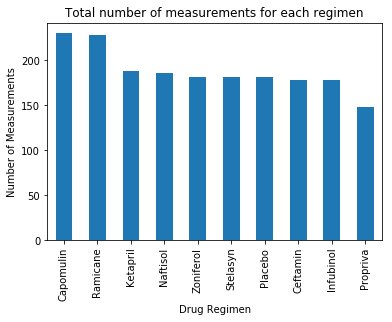

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_regimen = clean_data['Drug Regimen'].value_counts() # count of each regimen - assumption is that each line is a measurement
bar_regimen.plot.bar() # bar plot 
plt.title("Total number of measurements for each regimen") # give the plot a title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

Text(0, 0.5, 'Number of Measurements')

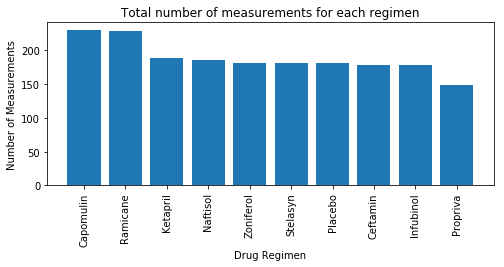

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

bar_regimen_df = pd.DataFrame(bar_regimen).reset_index() # Create a new dataframe to hold the regimen count
# num_regimen_df
x_axis = bar_regimen_df["index"] # identify x-axis
tick_locations = [value for value in x_axis] # for cleaner plot - create a ticker location for x-axis values

# plot the dataframe
plt.figure(figsize=(8, 3))
plt.bar(x_axis,bar_regimen_df['Drug Regimen'] )
plt.xticks(tick_locations,rotation="vertical")
plt.title("Total number of measurements for each regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

Both bar charts above are identical. 

----
Observations are that the number of measures taken throughout the study for Capomulin and Ramicane are higher than the other drugs in the study. At first, it may seem that'd be the reason for a better mean and a more centered standard deviation. But the standard errors for the 2 drugs is still far better than the rest in the study. Meaning that any sample taken out of the data will still yeild similar scatter around the mean.

-----

Code and figure below:
Both pie plots below are identical. They show the distribution of mouse gender. 


Gender distribution:

Male: 958 - 51%

Female: 922 - 49%

Because the distribution of male vs female are ALMOST identical, we can conclude that gender may not affect any analysis downstream. 

Male      958
Female    922
Name: Sex, dtype: int64

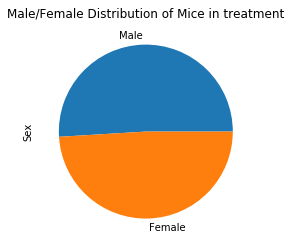

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_sex = clean_data["Sex"].value_counts()
pie_sex.plot.pie()
plt.title("Male/Female Distribution of Mice in treatment")
pie_sex

Text(0.5, 1.0, 'Male/Female Distribution of Mice in treatment')

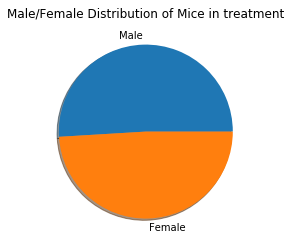

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# num_sex
labels = 'Male', 'Female'
plt.pie(pie_sex,labels=labels,shadow=True,radius=1)
plt.title("Male/Female Distribution of Mice in treatment")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# filter out all other treatment regimens; keep: Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimen = clean_data[
    (clean_data['Drug Regimen']=='Capomulin')|
    (clean_data['Drug Regimen']=='Ramicane')|
    (clean_data['Drug Regimen']=='Infubinol')|
    (clean_data['Drug Regimen']=='Ceftamin')
]

# Start by getting the last (greatest) timepoint for each mouse
# remove duplicates, keep last last value for 
last_value = four_regimen.drop_duplicates(['Mouse ID'], keep='last') # keeps the last value of each regimen's timepoint
# last_value.head(35)

In [13]:
# Put treatments into a list for for loop (and later for plot labels)

# new df for quartile anlaysis
treatments = last_value[['Drug Regimen','Tumor Volume (mm3)']]#,'Tumor Volume (mm3)']]
# treatments['Drug Regimen'].value_counts()

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = treatments['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lower_quartiles = round(quartiles[0.25],2)
upper_quartiles = round(quartiles[0.75],2)
IQR = round(upper_quartiles - lower_quartiles,2)

print(f"The lower quartile of occupancy is: {lower_quartiles}")
print(f"The upper quartile of occupancy is: {upper_quartiles}")
print(f"The interquartile range of occupancy is: {IQR}")

print()
print(f"List of the quartiles:")
print(quartiles)
print()
# calculate lower bound and upper bound - helps identify what the range of outliers could be
lower_bound = round(lower_quartiles - (1.5*IQR),2)
upper_bound = round(upper_quartiles + (1.5*IQR),2)

print(f"Any Tumor volume values below {lower_bound} could be potential outliers.")
print(f"ny Tumor volume values above {upper_bound} could be potential outliers.")

The lower quartile of occupancy is: 37.19
The upper quartile of occupancy is: 59.93
The interquartile range of occupancy is: 22.74

List of the quartiles:
0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Volume (mm3), dtype: float64

Any Tumor volume values below 3.08 could be potential outliers.
ny Tumor volume values above 94.04 could be potential outliers.


----
The above code shows the lower and upper quartiles of the Tumor Volume. Using the lower bound and upper bound technique, I can create a range of where potential outliers could be. But it would be best to plot some data on a box and whisker plot to truly see where there might be some outliers.

-----

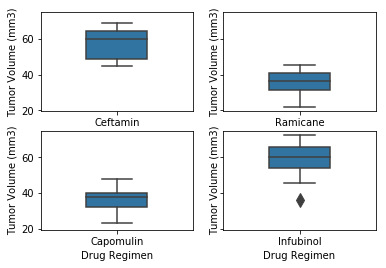

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Ceftamin = treatments[(treatments['Drug Regimen'] =='Ceftamin')]
Ramicane = treatments[(treatments['Drug Regimen'] =='Ramicane')]
Capomulin = treatments[(treatments['Drug Regimen'] =='Capomulin')]
Infubinol = treatments[(treatments['Drug Regimen'] =='Infubinol')]

# box = sns.FacetGrid(treatments,col='Drug Regimen',sharex=False,xlim=75)
# box.map(sns.boxplot,'Tumor Volume (mm3)')

# sns.set(style="whitegrid")
# treatments_data = sns.load_dataset("treatments")

fig, axes = plt.subplots(2, 2,sharey=True,squeeze=False)

ax = sns.boxplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=Ceftamin,
    ax=axes[0, 0],width=0.4)
ax = sns.boxplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=Ramicane,
    ax=axes[0, 1],width=0.4)
ax = sns.boxplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=Capomulin,
    ax=axes[1, 0],width=0.4)
ax = sns.boxplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=Infubinol, fliersize=10,
    ax=axes[1, 1],width=0.4)

The above code and figure shows a box and whisker plots for Tumor volume for EACH of the 4 selected drug regimen.

We can visually see each plot; side by side, where the mean is clustered, the max and min values, the upper and lower quartiles, the middle-most value, and any outliers.

Visually, we can see that within the 4 drug regimen that is believed to have promising treatment, Ramicane and Capomulin have the lowest average tumor size. 

Infubinol is the only treatment out of the four that shows an outlier. There seem to be a mouse (maybe more) whose response to the treament seems better than those on the same drug regimen. 

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

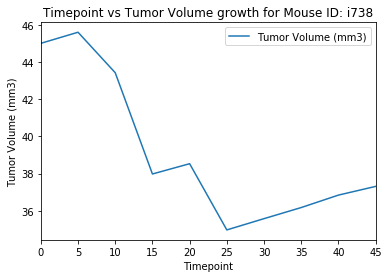

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# indentifying all mouse ID under the Capomulin treatment
mice_under_Capomulin = four_regimen[four_regimen['Drug Regimen']=='Capomulin'] # filtering for Capomulin treatment
mice_under_Capomulin['Mouse ID'].unique() # looking at all unique mouse IDs under the treatment. 

mouse_id = 'i738'# selecting a mouse ID

# filtering the data to JUST Capomulin treatments and the selected mouse ID
Capomulin_mouseID = four_regimen[(four_regimen['Mouse ID']==mouse_id) & (four_regimen['Drug Regimen']=='Capomulin')]

# plot
lineplot = Capomulin_mouseID.plot.line(x='Timepoint',y='Tumor Volume (mm3)')

# labels for plot
plt.title("Timepoint vs Tumor Volume growth for Mouse ID: i738")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

The above code and figure shows a trend line of tumor size going down as a response of time. This shows progress of tumor shrinking for a mouse on the Capomulin treament. The tumor appears to shrink rapidly between day 5 and 15, shrinking even further to almost nothing by day 25, but it appears to be growing right after. 

-----
The below code and figure shows a scatter plot of the average tumor size based on the weight grouping of mice in the Capomulin treatment.

The plot shows a very positive linear correlation between mouse weight and the average size of tumor growth. 

Text(0, 0.5, 'Tumor Volume (mm3)')

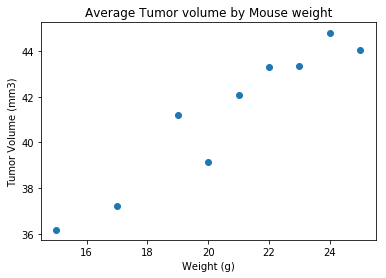

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

tum_weight = four_regimen[['Weight (g)','Drug Regimen','Tumor Volume (mm3)']] # selecting columns needed for scatter plot analysis
tum_weight = tum_weight[tum_weight['Drug Regimen']=='Capomulin'] # filtering for Capomulin treatments only
# tum_weight

# grouping the data by weight and passing the average tumor size for each of the weight groups
avgTum_weight = tum_weight.groupby(['Weight (g)'])

# calculate the mean of Tumor volume for each weight group - resetting index and passing the new table into a dataframe for scatter plot
avgTum_weight = avgTum_weight['Tumor Volume (mm3)'].mean().to_frame(name = 'Average Tumor volume').reset_index() 

# scatter plot
plt.scatter(avgTum_weight['Weight (g)'],avgTum_weight['Average Tumor volume'])

# labels for plot
plt.title("Average Tumor volume by Mouse weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model
Weight = avgTum_weight.iloc[:,0] # all values in Weight
Avg_tum_vol = avgTum_weight.iloc[:,1] # all values in Average Tumor weight

correlation = st.pearsonr(Weight,Avg_tum_vol) # calculating the correlation coefficient

print(f"The correlation between both factors is {round(correlation[0],2)}") # 0.95
print()
print("0.95 shows a VERY strong positive correlation between the weight of a mouse vs the avg tumor volume")

The correlation between both factors is 0.95

0.95 shows a VERY strong positive correlation between the weight of a mouse vs the avg tumor volume


y = 0.89x + 22.76


Text(0, 0.5, 'Tumor Volume (mm3)')

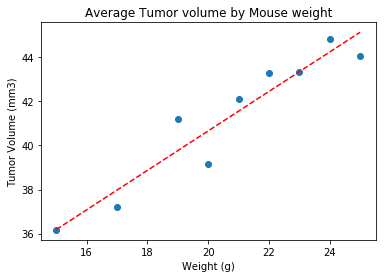

In [18]:
# for mouse weight and average tumor volume for the Capomulin regimen

# calculate linear regression
data_regress = linregress(Weight,Avg_tum_vol)
# data_regress

# add the linear equation line to the plot
# unpack the regression 
(slope, intercept, rvalue, pvalue, stderr) = data_regress

# using the regression formula (y = mx + b) pass the unpacked values into a variable
reg_value = Weight*slope + intercept

equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(equation)
plt.scatter(Weight,Avg_tum_vol) # redo the scatter plot
plt.plot(Weight,reg_value,"r--") # pass in the calculated regression line as the y-axis
plt.title("Average Tumor volume by Mouse weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

In an attempt to prove the positive linear relationship between the weight of a mouse and the size of tumor, the above code and figure shows a regression line added to the scatter plot. The observation here is that the regression line tells us that there is a positive relationship. The slope of the line, 0.89, alters the independent variable, values from the weight column, helps estimate what the potential tumor volume will be. 